# Module 4: Deep Learning

## Sprint 1: Computer Vision

## Know Your Mushrooms

<div style="text-align:center">
<div><img style="width:400px" src="https://i.pinimg.com/originals/9b/ed/89/9bed89fee3e35c30bbc30f9e9d82b859.jpg"></img><div>
<div style="margin-bottom:20px; color:rgb(117, 117, 117);font-size:12px;">Source: https://www.pinterest.com/pin/597641813035305267/</div>
</div>

## Background

In US alone, around 7500 yearly cases of mushrooms poisoning are reported [(Source)](https://www.tandfonline.com/doi/full/10.1080/00275514.2018.1479561). According to the source, "misidentification of edible mushroom species appears to be the most common cause and may be preventable through education". To avoid expenses for hospitalization and in some cases pointless deaths, you have been hired by US National Health Service to create a machine learning model, that can recognize mushroom types. They want to install this on hand-held devices and to help people make the right choice when mushroom picking. 

---

## Concepts to explore

Today, we will put everything we learned in this module and use it to solve a classification problem. The idea of this project is to use transfer learning on an architecture of your choice and fine-tune to predict mushroom types.

You will use this Kaggle dataset https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images

## How to start?

### Data
Well, the obvious first steps will be getting the data from Kaggle. There are a number of choices on how to do it, such as downloading images to your machine and then uploading to Drive or using [Kaggle API](https://github.com/Kaggle/kaggle-api). Once you get your data, start with an EDA, as this will directly feed into design choices for your architecture.

### Modeling

My suggestion is that you start with a simple pre-trained architecture, like ResNet18. This will allow you to fine-tune your net faster and if results are not too good, you can try switching to a larger model later. 
It is recommended that you use PyTorch Lightning or FastAI. Both are equally good for simple problems like this, but PyTorch Lightning will give you more control, better customization ability, and better understanding of your network.

## Requirements:

- Choose whichever framework you prefer from FastAI, PyTorch Lightning or PyTorch.
- As always - EDA
- Use a pre-trained neural net as a backbone of your class
- Train a classifier. Don't forget to fine-tune
- Evaluate inference time
- Visualize results

## Evaluation Criteria

- Model performance
  - Classification performance
  - Inference speed
- EDA and documented findings
- Results analysis
- Code quality

## Bonus challenges

- Repeat the process with modifications to your network and see how the results vary. 
  - Try a different optimizer
  - Add an intermediate layer between the backbone and output layer

## work with kaggle and getting data

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"titasjanuonis","key":"58af6761b7f5ec0c8ddc7d526283e8ce"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-04-30 20:52:11           3996  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2298  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            508  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            232  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [4]:
! kaggle datasets download -d maysee/mushrooms-classification-common-genuss-images

100% 1.85G/1.85G [00:58<00:00, 44.2MB/s]
100% 1.85G/1.85G [00:58<00:00, 33.9MB/s]


In [5]:
! mkdir data
! unzip mushrooms-classification-common-genuss-images.zip -d data

Srautinio perdavimo išvestis sutrumpinta iki kelių paskutinių eilučių (5000).
  inflating: data/mushrooms/Mushrooms/Boletus/0622_axDS6XbWq14.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0623_rGwoTDghdAY.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0624_RmlDHXvJUeU.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0625_zqKe97TlLiA.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0626_Vr79bfyR04Q.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0627_eN6cXmAY_WM.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0628_HgADwtCnaLg.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0629_vlmH59caIwg.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0630_dhxHhToh_80.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0631_PJXNFQZc7n8.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0632_Rc_3hYDbYqU.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0633_0hFXcQuG57k.jpg  
  inflating: data/mushrooms/Mushrooms/Boletus/0634_T00gs2bFUuQ.jpg  
  inflating: data/mushroo

In [6]:
%cd data
%rm -rf mushrooms

/content/data


## import insight from data

In [7]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 4.3MB/s 
     |████████████████████████████████| 61kB 3.7MB/s 
     |████████████████████████████████| 776.8MB 18kB/s 
     |████████████████████████████████| 12.8MB 42.7MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [8]:
import os

from fastai.vision.all import *
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## EDA


There are 9 classes to classify. Each of the class has between 300 to 15000 samples of images.

In [9]:
path = "/content/data/Mushrooms"

In [10]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224))

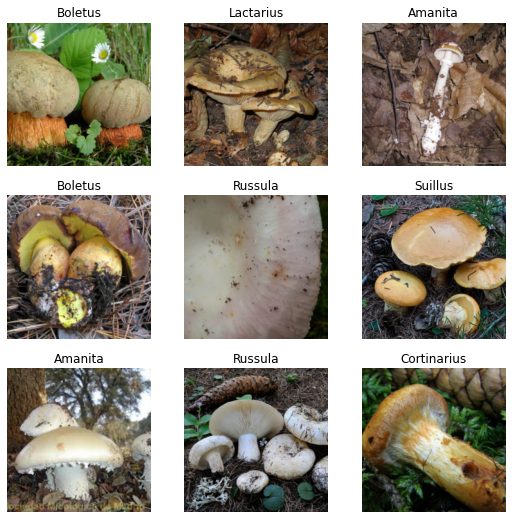

In [11]:
dls.show_batch()

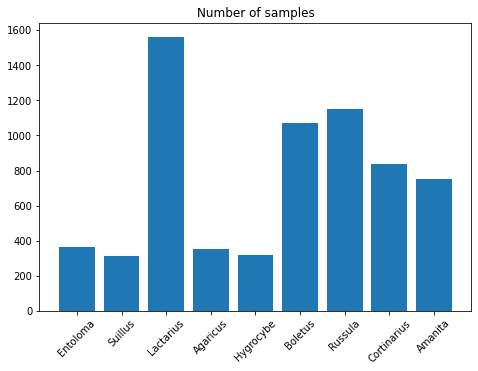

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

types = os.listdir(path)
number = []
for sub in os.listdir(path):
    number.append(len(os.listdir(path + "/" + sub)))

ax.set_title('Number of samples')
ax.bar(types, number)
plt.xticks(rotation = 45)
plt.show()

## Modeling


In [17]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [15]:
1e-2

0.01

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.004365158267319202)

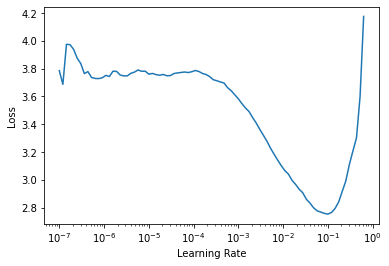

In [ ]:
learn.lr_find()

In [18]:
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.583843,1.075401,0.343517,31:14


epoch,train_loss,valid_loss,error_rate,time
0,0.886522,0.793677,0.245902,43:26
1,0.423008,0.481752,0.169151,43:20


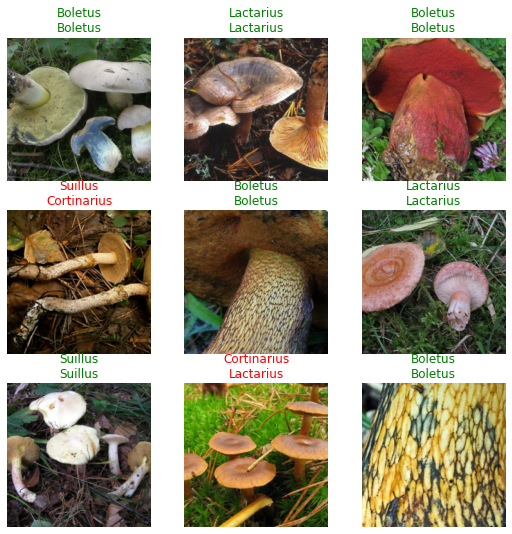

In [19]:
learn.show_results()

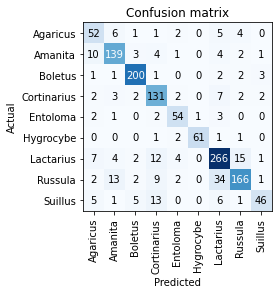

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()